In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('datasets/07/imdb/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# 2 Feature engineering

In [3]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [4]:
df['sentiment'] = df['sentiment'].replace({'positive':1, 'negative':0}).astype('int')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

In [6]:
X = df['review']
y = df['sentiment']

In [7]:
text_processor = Pipeline([
    ('vectorizer', CountVectorizer(max_features = 10000)),
    ('tfidf', TfidfTransformer())
])

In [8]:
X_processed = text_processor.fit_transform(X)

In [9]:
X_processed

<50000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 6279588 stored elements in Compressed Sparse Row format>

In [10]:
X_processed.shape[1]

10000

<hr>

# 3 Modeling

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import regularizers

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, stratify=y, random_state=1, test_size=0.30)

In [56]:
model = None
model = keras.models.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_processed.shape[1],)),
    keras.layers.Dropout(0.5, noise_shape=None, seed=None),
    keras.layers.Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(0.0001)),
    keras.layers.Dropout(0.5, noise_shape=None, seed=None),
    keras.layers.Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(0.0001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [57]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 128)               1280128   
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 1)                

In [58]:
opt = keras.optimizers.Adam(learning_rate=0.00005)
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.compile(loss="binary_crossentropy",
             optimizer=opt,
             metrics=["accuracy"])


In [59]:
history = model.fit(
    X_train.toarray(), 
    y_train, 
    epochs=20, 
    callbacks=[callback], 
    validation_data=(X_test.toarray(), y_test),
    batch_size=128
)

Epoch 1/20
274/274 [==============================] - 8s 25ms/step - loss: 0.7155 - accuracy: 0.5492 - val_loss: 0.7064 - val_accuracy: 0.7943
Epoch 2/20
274/274 [==============================] - 5s 18ms/step - loss: 0.6584 - accuracy: 0.7407 - val_loss: 0.5261 - val_accuracy: 0.8583
Epoch 3/20
274/274 [==============================] - 5s 17ms/step - loss: 0.4393 - accuracy: 0.8483 - val_loss: 0.3210 - val_accuracy: 0.8892
Epoch 4/20
274/274 [==============================] - 5s 18ms/step - loss: 0.3159 - accuracy: 0.8883 - val_loss: 0.2787 - val_accuracy: 0.8995
Epoch 5/20
274/274 [==============================] - 5s 18ms/step - loss: 0.2697 - accuracy: 0.9065 - val_loss: 0.2687 - val_accuracy: 0.9024
Epoch 6/20
274/274 [==============================] - 5s 19ms/step - loss: 0.2438 - accuracy: 0.9172 - val_loss: 0.2655 - val_accuracy: 0.9035
Epoch 7/20
274/274 [==============================] - 5s 17ms/step - loss: 0.2230 - accuracy: 0.9279 - val_loss: 0.2667 - val_accuracy: 0.9035

<AxesSubplot:>

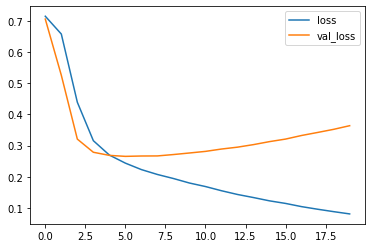

In [60]:
import pandas as pd
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()